# Titanic and Lusitania Data Mining

In [1]:
import pandas as pd
import numpy as np
import re
import math
from scipy.stats import chi2_contingency
from collections import OrderedDict
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

##### Load the data into a Pandas DataFrame:

In [2]:
titanic = pd.read_csv('../data/titanic.csv')
lusit = pd.read_csv('../data/lusitania.csv')

##### Observations:

In [3]:
print "Titanic dataset contains {} instances and {} features".format(titanic.shape[0], titanic.shape[1]) 

Titanic dataset contains 1309 instances and 14 features


In [4]:
print "Titanic dataset contains {} instances and {} features".format(lusit.shape[0], lusit.shape[1]) 

Titanic dataset contains 1961 instances and 23 features


##### Missing Values:

In [5]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [6]:
lusit.isnull().sum()

Family name                                0
Title                                      0
Personal name                              3
Fate                                       0
Age                                      653
Department/Class                           0
Passenger/Crew                             0
Citizenship                                2
Position                                1270
Status                                  1166
City                                     682
County                                  1890
State                                    929
Country                                  638
Lifeboat                                1829
Rescue Vessel                           1810
Body No.                                1750
Ticket No.                              1677
Cabin No.                               1632
Traveling Companions and other notes    1363
Value                                      0
Adult/Minor                                0
Sex       

In [7]:
titanic.columns = [col.replace(".", "_") for col in titanic.columns]

In [8]:
lusit.columns = [col.lower().replace(" ", "_").replace("/", "_") for col in lusit.columns]

###### Let's check the age column for any discrepancies then plot their distribution:

In [9]:
titanic['age'].unique()

array([ 29.  ,   0.92,   2.  ,  30.  ,  25.  ,  48.  ,  63.  ,  39.  ,
        53.  ,  71.  ,  47.  ,  18.  ,  24.  ,  26.  ,  80.  ,    nan,
        50.  ,  32.  ,  36.  ,  37.  ,  42.  ,  19.  ,  35.  ,  28.  ,
        45.  ,  40.  ,  58.  ,  22.  ,  41.  ,  44.  ,  59.  ,  60.  ,
        33.  ,  17.  ,  11.  ,  14.  ,  49.  ,  76.  ,  46.  ,  27.  ,
        64.  ,  55.  ,  70.  ,  38.  ,  51.  ,  31.  ,   4.  ,  54.  ,
        23.  ,  43.  ,  52.  ,  16.  ,  32.5 ,  21.  ,  15.  ,  65.  ,
        28.5 ,  45.5 ,  56.  ,  13.  ,  61.  ,  34.  ,   6.  ,  57.  ,
        62.  ,  67.  ,   1.  ,  12.  ,  20.  ,   0.83,   8.  ,   0.67,
         7.  ,   3.  ,  36.5 ,  18.5 ,   5.  ,  66.  ,   9.  ,   0.75,
        70.5 ,  22.5 ,   0.33,   0.17,  40.5 ,  10.  ,  23.5 ,  34.5 ,
        20.5 ,  30.5 ,  55.5 ,  38.5 ,  14.5 ,  24.5 ,  60.5 ,  74.  ,
         0.42,  11.5 ,  26.5 ])

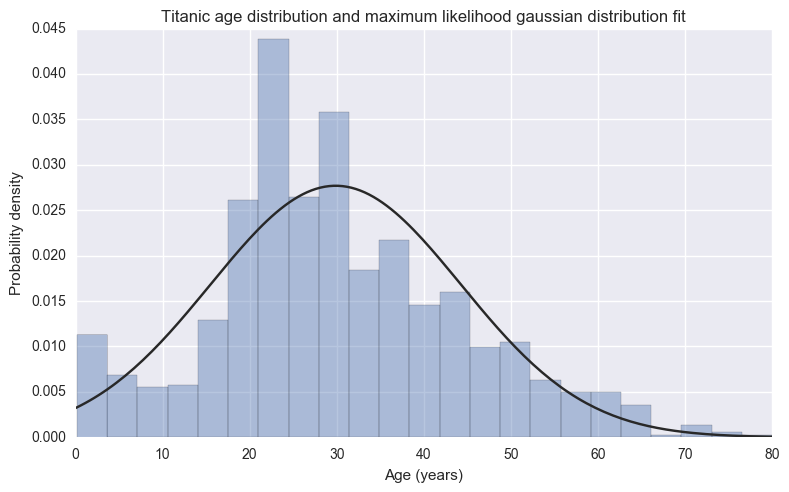

In [10]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.distplot(titanic['age'].dropna(), fit=norm, kde=False)
ax.set_xlabel('Age (years)')
ax.set_ylabel('Probability density')
ax.set_title('Titanic age distribution and maximum likelihood gaussian distribution fit')

plt.xlim(0,80)
fig.tight_layout()

plt.show()

In [11]:
lusit['age'].unique()

array(['38', '37', '30', '25', '27', '48', nan, '24', '19 ?', '57', '50',
       '56', '41', '19', '33', '29', '18', '20', '21', '26', '17', '58',
       '47', '54', '35', '43', '59', '53', '44', '51', '40', '49', '42',
       '32', '31', '34', '22', '45', '36', '29 ?', '52', '23', '60', '28',
       '16', '46', '15', '39', '63 ?', '55', '64', '53 ?', '09-months',
       '6', '9', '14', '10', '12', '?', '62', '5', '8', '65', '68', '76',
       '61', '63', '03-months', '1.5', '2.5', '18-months', '3', '2',
       '25 ?', '08-months', '4', '15-months', '14-months', 'Infant',
       '3-6-months ?', '51 or 47', '45 or 51', '22 (?)', '17-months',
       '13-months', '02-months', '49 ?', '05-months', '11', '59 (64?)',
       '63 (51?)', '37 (39?)', '32 (22?)', '31 (32?)', '24 (23?)', '27?',
       '7', '42?', '31 ?', '10-months', '38 (?)', '70', '62 (?)',
       '06-months', '13', '2_', '11-months', '30 ?', '34?', '1',
       '39 (47?)', '67', '73', '72', '11-months (3?)', '4.25', '69', '26?'

###### The lusitania age column is a mess and needs cleaning and processing:

In [12]:
def clean_lusitAge(row):
    regex = r"(\d+)(\?)"
    
    if type(row) == str and "-" in row:
        row = round(float(row.split("-")[0])/12, 2)
    
    if type(row) == str:
        row = row.split(" ")[0]
        row = row.replace("Infant", "0.08").replace("_", "")
        row = re.sub(regex, r"\1", row)
        row = np.where(row == '?', 0, row)
        
    return row

In [13]:
lusit['age'] = lusit['age'].apply(clean_lusitAge)

In [14]:
lusit['age'] = lusit['age'].astype(float)

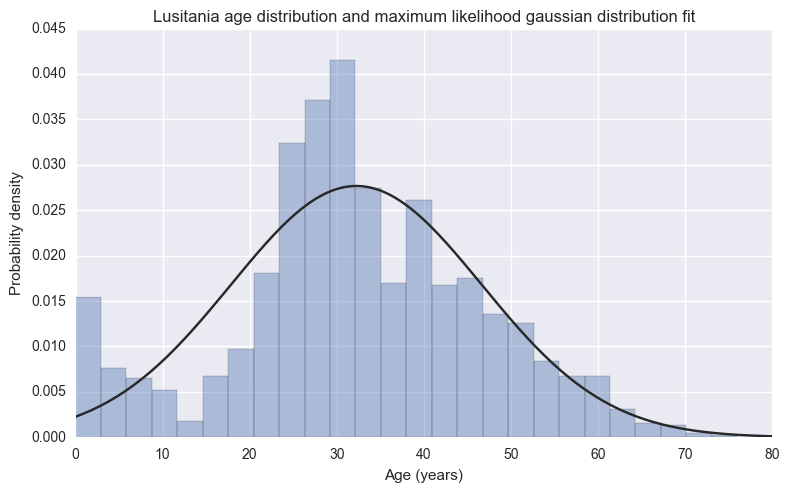

In [15]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.distplot(lusit['age'].dropna(), fit=norm, kde=False)
ax.set_xlabel('Age (years)')
ax.set_ylabel('Probability density')
ax.set_title('Lusitania age distribution and maximum likelihood gaussian distribution fit')

plt.xlim(0,80)
fig.tight_layout()

plt.show()

## Data Imputation & Feature Engineering: Creating new variables

In [16]:
print "{} missing age values in Titanic dataset".format(titanic['age'].isnull().sum())

263 missing age values in Titanic dataset


In the name column from Titanic, we have titles. I will extract the titles and map missing age values. Titles also may reflect social status and may help predict survival probability.

Extract Cabin category information from the Cabin number

In [17]:
def extract_titanicTitle(row):
    pattern = re.compile("(, .+?\.)")
    row = pattern.findall(row)
    row = row[0].replace(", ", "")        
    
    return row

In [18]:
titanic["title"] = titanic["name"].apply(extract_titanicTitle)

In [19]:
titanicAge_dict = titanic.groupby(['title'])['age'].mean().to_dict()

In [20]:
def fill_titanicAge(row):
    global titanicAge_dict
    age = row['age']
    title = row['title']
    if math.isnan(age):
        if title in titanicAge_dict.keys():
            return titanicAge_dict[title]
    else:
        return age

In [21]:
titanic['age'] = titanic.apply(fill_titanicAge, axis=1)

In [22]:
print "{} missing age values in Lusitania dataset".format(lusit['age'].isnull().sum())

653 missing age values in Lusitania dataset


I will use the title column here as well to impute the missing age values.

In [23]:
def clean_lusitTitle(row):
    row = row.replace("Mr. (later Sir)", "Sir")
    row = row.replace("Master (?)", "Master")
    row = "".join(row.split(" "))   
    
    return row

In [24]:
lusit["title"] = lusit["title"].apply(clean_lusitTitle)

In [25]:
lusitAge_dict = lusit.groupby(['title'])['age'].mean().to_dict()

In [26]:
def fill_lusitAge(row):
    global lusitAge_dict
    age = row['age']
    title = row['title']
    if math.isnan(age) or age == 0.0:
        if title in lusitAge_dict.keys():
            return lusitAge_dict[title]
    else:
        return age

In [27]:
lusit["age"] = lusit.apply(fill_lusitAge, axis=1)

In [28]:
titanic['life'] = titanic['survived'].apply(lambda x: 'survived' if x == 1 else 'deceased')

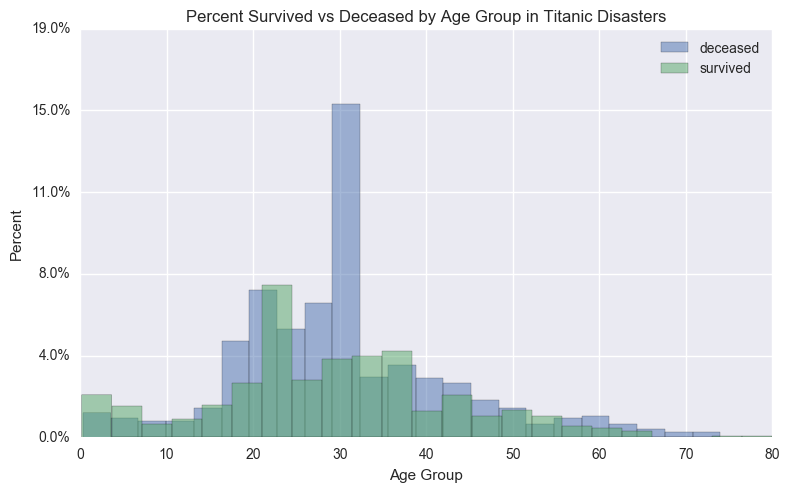

In [29]:
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations
    s = str(round(y/1309.0*100))

    # The percent symbol needs escaping in latex
    if plt.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

fig, ax = plt.subplots(figsize=(8,5))

# the histogram of the data
titanic.groupby(['life'])['age'].plot.hist(alpha=0.5, ax=ax, legend = True, bins=23)

formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

ax.set_xlabel('Age Group')
ax.set_ylabel('Percent')
ax.set_title('Percent Survived vs Deceased by Age Group in Titanic Disasters')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.grid(True)

plt.show()

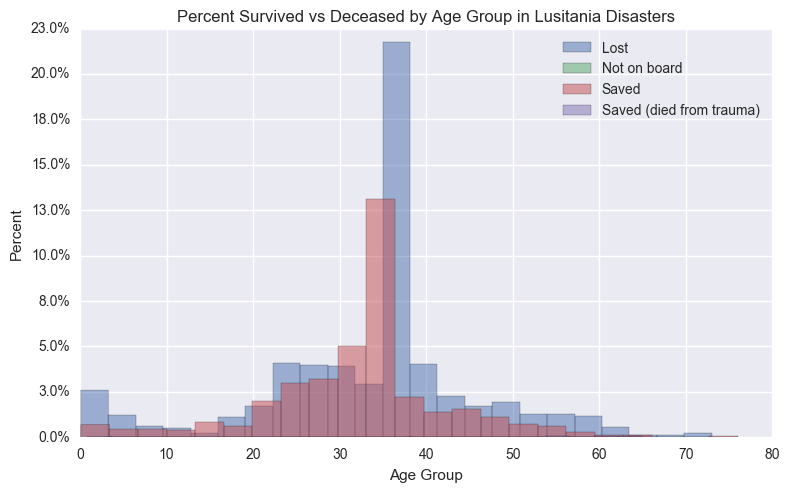

In [30]:
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations
    s = str(round(y/1961.0*100))

    # The percent symbol needs escaping in latex
    if plt.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

fig, ax = plt.subplots(figsize=(8,5))

# the histogram of the data
lusit.groupby(['fate'])['age'].plot.hist(alpha=0.5, ax=ax, legend = True, bins=23)

formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

ax.set_xlabel('Age Group')
ax.set_ylabel('Percent')
ax.set_title('Percent Survived vs Deceased by Age Group in Lusitania Disasters')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.grid(True)

plt.show()

###### Distribution of ages in groups of Titanic passengers

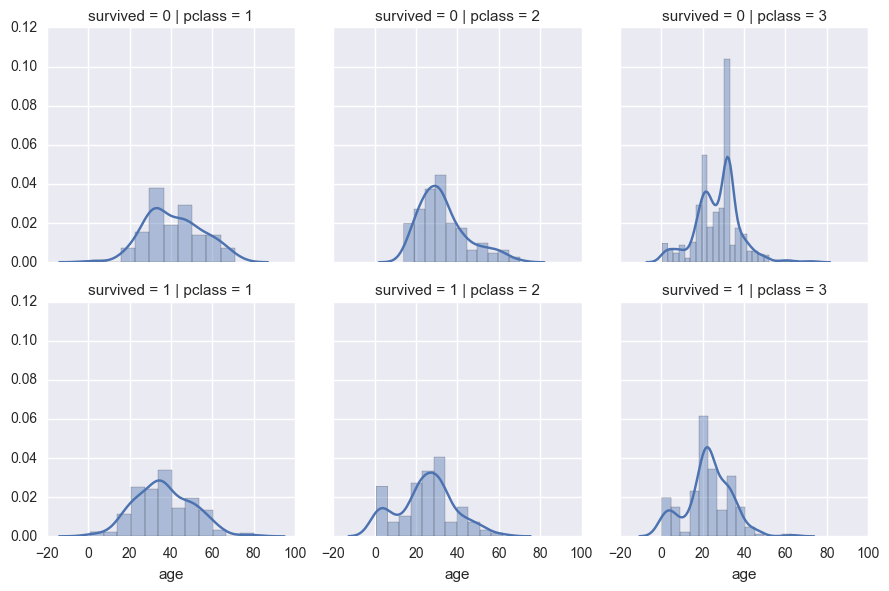

In [31]:
g = sns.FacetGrid(titanic, row='survived', col='pclass')
g.map(sns.distplot, "age")

plt.grid(True)
plt.show()

###### Make age groups 0-12 child, 12-17 teenager, 17-60 adult, 60+ elder 

In [32]:
bins = [0, 12, 17, 60, np.inf]
labels = ['child', 'teenager', 'adult', 'elder']
titanic['age_group'] = pd.cut(titanic.age, bins, labels=labels)

###### Annotated heatmap of survivors by groups of passengers:

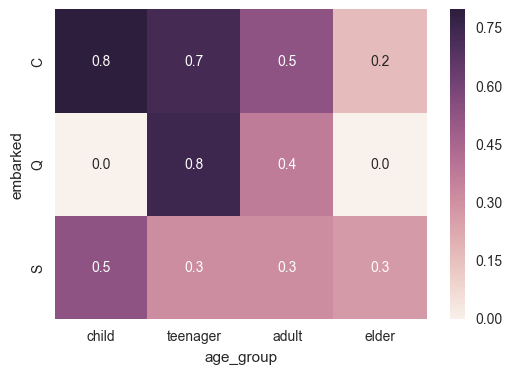

In [33]:
df = titanic.pivot_table(index='embarked', columns='age_group', values='survived', aggfunc=np.mean)
ax = sns.heatmap(df, annot=True, fmt=".1f")

###### Annotated heatmap of Pearson correlation coefficients between features in Titanic

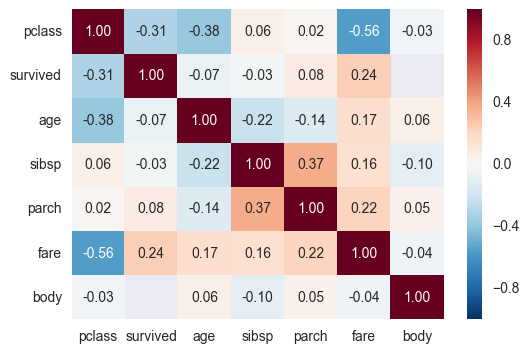

In [34]:
ax = sns.heatmap(titanic.corr(), annot=True, fmt=".2f")

###### Distribution of survivors by age and sex 

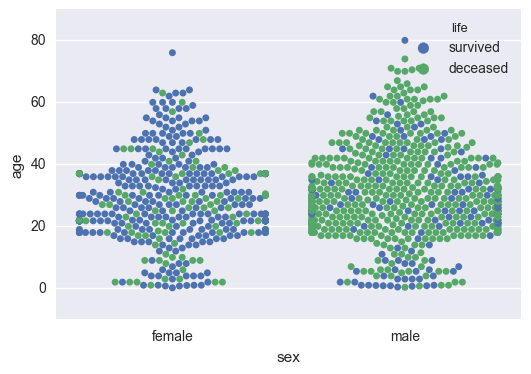

In [35]:
ax = sns.swarmplot(x="sex", y="age", hue="life", data=titanic)

## Group Statistics & Chi Square Test 

In [36]:
titanic['deceased'] = titanic['survived'].apply(lambda x: 1 if x == 0 else 0)
titanic['all'] = titanic['survived'] + titanic['deceased']
titanic['survival_rate'] = titanic['survived']/titanic['all']

###### Survival Rate by Sex

Females had a much higher survival rate than males. The p-value is 4.5899249369529454e-81, indicating a statistically significant difference at any reasonable significance level.

In [37]:
table = pd.crosstab(titanic['sex'], titanic['life'])
table

life,deceased,survived
sex,,
female,127,339
male,682,161


In [38]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 4.58992493695e-81


###### Survival Rate by Passenger Class

There appears to be a strong relationship between class and survival rate: first-class had the highest survival rate, then second, then third.

In [39]:
titanic.groupby(['pclass']).agg(OrderedDict([('deceased', 'sum'),
                                            ('survived', 'sum'),
                                            ('all', 'sum'),
                                            ('survival_rate', 'mean')]))

,deceased,survived,all,survival_rate
pclass,,,,
1,123,200,323,0.619195
2,158,119,277,0.429603
3,528,181,709,0.255289


In [40]:
table = pd.crosstab(titanic['pclass'], titanic['life'])
table

life,deceased,survived
pclass,,
1,123,200
2,158,119
3,528,181


In [41]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 1.72082595883e-28


###### Survival Rate by Age Group

There appears to be a strong relationship between age and survival rate: The p-value is 4.24066535673e-06, indicating a statistically significant difference at any reasonable significance level.

In [42]:
bins = np.linspace(titanic.age.min(), titanic.age.max(), 10)
table = pd.crosstab(np.digitize(titanic.age, bins), titanic['life'])
table

life,deceased,survived
row_0,,
1,37,53
2,41,31
3,222,148
4,303,124
5,106,68
6,51,48
7,33,22
8,15,4
9,1,1


In [43]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 4.24066535673e-06


###### Survival Rate by Class and Sex

In [44]:
titanic.groupby(['pclass','sex']).agg(OrderedDict([('deceased', 'sum'),
                                                    ('survived', 'sum'),
                                                    ('all', 'sum'),
                                                    ('survival_rate', 'mean')]))

deceased  survived  all  survival_rate
pclass sex                                           
1      female         5       139  144       0.965278
       male         118        61  179       0.340782
2      female        12        94  106       0.886792
       male         146        25  171       0.146199
3      female       110       106  216       0.490741
       male         418        75  493       0.152130

## Comparative Statistics:  Lusitania

In [45]:
lusit['lost'] = lusit['fate'].apply(lambda x: 1 if x == 'Lost' else 0)
lusit['not_on_board'] = lusit['fate'].apply(lambda x: 1 if x == 'Not on board' else np.nan)
lusit['saved'] = lusit['fate'].apply(lambda x: 1 if x == 'Saved' else 0)
lusit['died_from_trauma'] = lusit['fate'].apply(lambda x: 1 if x == 'Saved (died from trauma)' else np.nan)
lusit['all'] = lusit['value']
lusit['survival_rate'] = (lusit['all'] - lusit['lost']) / lusit['all']

###### Survival Rate by Sex

The p-value is greater than 0.05, indicating a statistically insignificant difference between survival rate of a female and male.

In [46]:
table = pd.crosstab(lusit['sex'], lusit['saved'])
table

saved,0,1
sex,,
Female,327,191
Male,871,572


In [47]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 0.291182076147


###### Survival Rate by Passenger vs Crew

The p-value is greater than 0.05, indicating a statistically insignificant difference between survival rate of a passenger vs crew.

Let's drop the stowaways since we have no information on them!

In [48]:
lusit = lusit[lusit['passenger_crew'] != 'Stowaway']

In [49]:
table = pd.crosstab(lusit['passenger_crew'], lusit['saved'])
table

saved,0,1
passenger_crew,,
Crew,403,290
Passenger,792,473


In [50]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 0.059455252032


###### Survival Rate by Class

Passenger accommodation:
* saloon (first class)
* second cabin (second class)
* third class

Crew accommodation:
* deck
* victualling
* engineering
    
The p-value is less than 0.05, indicating a statistically significant difference between survival rate of Class.

In [51]:
lusit['department_class'] = lusit['department_class'].str.replace(r'Third \(Distressed British Seaman\)', 'Third')

In [52]:
lusit.groupby(['department_class']).agg(OrderedDict([('lost', 'sum'),
                                                    ('saved', 'sum'),
                                                    ('all', 'count'),
                                                    ('survival_rate', 'mean')]))

,lost,saved,all,survival_rate
department_class,,,,
Band,2,3,5,0.600000
Deck,32,37,69,0.536232
Engineering,201,112,313,0.357827
Saloon,177,112,291,0.389655
Second,372,227,601,0.381032
Third,239,134,373,0.359249
Victualling,167,138,306,0.454248


In [53]:
table = pd.crosstab(lusit['department_class'], lusit['saved'])
table

saved,0,1
department_class,,
Band,2,3
Deck,32,37
Engineering,201,112
Saloon,179,112
Second,374,227
Third,239,134
Victualling,168,138


In [54]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 0.0189448858527


###### Survival Rate by Age Group

There appears to be a strong relationship between age and survival rate: The p-value is 3.83316420923e-06, indicating a statistically significant difference at any reasonable significance level.

In [55]:
bins = np.linspace(lusit.age.min(), lusit.age.max(), 10)
table = pd.crosstab(np.digitize(lusit.age, bins), lusit['saved'])
table

saved,0,1
row_0,,
1,86,31
2,22,26
3,136,93
4,203,185
5,539,334
6,109,61
7,70,26
8,23,6
9,7,0


In [56]:
chi, p, df, expected = chi2_contingency(table)
print "p-value:", p

p-value: 3.83316420923e-06


#### What does the group-wise survival rate imply about circumstances during these two ship wrecks?

In Titanic wreck, women, children and class were considered. 

In the Lusitania wreck, sex and somewhat class wasn't really considered. Age did have a significant affect of survival rate.